## Google Location

This code will parse your Google Location export data, create a CSV, and do some simple data checks and data analysis. 

Enjoy! 

#### First, we need to convert Location History.json to CSV

In [1]:
import generate
generate

Reading location history JSON file...
Loading JSON internally...
Creating your CSV file...
10% completed
20% completed
30% completed
40% completed
50% completed
60% completed
70% completed
80% completed
90% completed
Done!


<module 'generate' from '/Users/brycedewitt/Documents/qs_ledger/Google Location/generate.py'>

#### Additional packages
If you run into import issues with the packages on the rows below, uncomment these lines and try to import them to the current kernel. 

In [ ]:
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install descartes
# !{sys.executable} -m pip install geopandas
# !{sys.executable} -m pip install shapely
# !{sys.executable} -m pip install matplotlib


In [13]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import glob
import csv
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install descartes
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install shapely
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

  Using cached https://files.pythonhosted.org/packages/5b/0c/e6c99e561b03482220f00443f610ccf4dce9b50f4b1093d735f93c6fc8c6/geopandas-0.6.2-py2.py3-none-any.whl
     |████████████████████████████████| 13.4MB 170kB/s eta 0:00:01    |████████▋                       | 3.6MB 75kB/s eta 0:02:11
     |████████████████████████████████| 1.6MB 102kB/s eta 0:00:01
     |████████████████████████████████| 17.9MB 47kB/s eta 0:00:019     |███████████████████████         | 12.9MB 86kB/s eta 0:00:58
  Using cached https://files.pythonhosted.org/packages/e9/da/824b92d9942f4e472702488857914bdd50f73021efea15b4cad9aca8ecef/click_plugins-1.1.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/cc/ab/85d8da5c9a45e072301beb37ad7f833cd344e04c817d97e0cc75681d248f/munch-2.5.0-py2.py3-none-any.whl


#### Data exploration

First, lets take a look through the better-formatted CSV to see what things look like.  Load your CSV:

In [2]:
data = pd.read_csv("data/out.csv", quoting=3, delimiter=',', skiprows=1, names=["timestamp", "longitudeE7", "latitudeE7", "accuracy", "altitude", "verticalAccuracy", "velocity"], dtype={'longitudeE7': np.float64, 'latitudeE7': np.float64 , 'accuracy':'Int64'})

 Lets take a look first at just how many rows of data points we have:

In [3]:
data.size

5312636

Next, we'll see what the first recorded values in the document are:

In [4]:
data.head()

,timestamp,longitudeE7,latitudeE7,accuracy,altitude,verticalAccuracy,velocity
0,2011-11-24 17:55:30.239000,-120.843097,35.364554,2795,-1,-1,-1
1,2011-11-24 18:56:37.265000,-120.843097,35.364554,2795,-1,-1,-1
2,2011-11-24 18:56:37.699000,-120.843097,35.364554,2795,-1,-1,-1
3,2011-11-24 18:56:39.487000,-120.833702,35.341048,2704,-1,-1,-1
4,2011-11-24 18:57:40.581000,-120.739505,35.329383,2429,-1,-1,-1


... and of course, lets take a look at what the most recent data points are:

In [5]:
data.tail()

,timestamp,longitudeE7,latitudeE7,accuracy,altitude,verticalAccuracy,velocity
758943,2020-01-13 14:27:24.443000,-71.087485,42.338264,65,9,10,-1
758944,2020-01-13 14:40:35.139000,-71.087675,42.338887,10,0,16,2
758945,2020-01-13 16:31:44.447000,-71.087837,42.339914,10,8,16,0
758946,2020-01-13 16:34:08,-71.106052,42.347102,2500,-1,-1,-1
758947,2020-01-17 01:54:24.159000,-71.087512,42.343032,65,9,10,-1


#### Diving a little deeper

In [15]:
street_map = gpd.read_file('./usa/cb_2018_us_ua10_500k.shp')

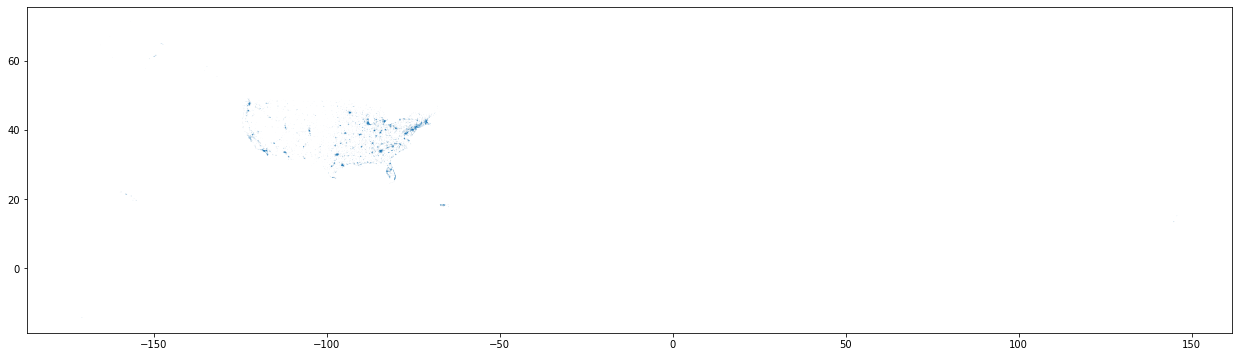

In [24]:
fig, ax = plt.subplots(figsize = (30, 6))
street_map.plot(ax = ax)

SyntaxError: invalid syntax (<ipython-input-9-d8603f9f9bc3>, line 1)

  Using cached https://files.pythonhosted.org/packages/e5/b6/1ed2eb03989ae574584664985367ba70cd9cf8b32ee8cad0e8aaeac819f3/descartes-1.1.0-py3-none-any.whl
